In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
dataset = pd.read_csv('Dataset Pengeluaran per Daerah 2.csv')
dataset.keys()

In [ ]:
dataku = pd.DataFrame(dataset)
dataku.head()

In [ ]:
X=np.asarray(dataset)
print(X)

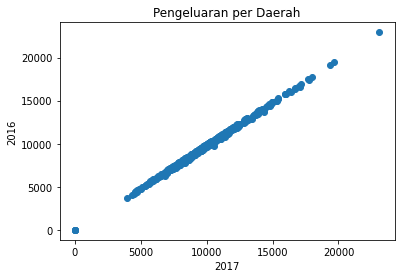

In [55]:
plt.scatter(X[:,1],X[:,2], label='True Position')
plt.xlabel("2017")
plt.ylabel("2016")
plt.title("Pengeluaran per Daerah")
plt.show()

In [56]:
from sklearn import preprocessing

In [57]:
minmax=preprocessing.MinMaxScaler().fit_transform(dataku.drop('Provinsi / Kabupaten / Kota',axis=1))

In [60]:
df = pd.DataFrame(minmax, index=dataku.index, columns=dataku.columns[:-1])

In [67]:
scr=[]
for i in range(1,20):
  score=KMeans(n_clusters=i).fit(df).score(df)
  print(score)
  scr.append(score)

-75.53903793674593
-36.43393518175131
-21.674308874538607
-13.813043681682576
-10.474243736141414
-8.51985535974019
-6.994899709425464
-5.372629035253996
-4.479357914162538
-3.888478156659002
-3.454945273765931
-2.9902229507204776
-2.6813765041530475
-2.315262620898904
-2.034393489909033
-1.7943346498646897
-1.5906362120376194
-1.4075345287363028
-1.2052346043274658


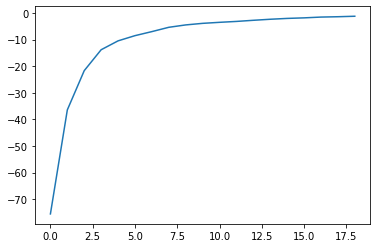

In [66]:
plt.plot(scr)

In [68]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [70]:
df['cluster'] = kmeans.labels_

In [71]:
df

,Provinsi / Kabupaten / Kota,2017,2016,2015,2014,2013,2012,2011,cluster
0,0.387782,0.382348,0.380521,0.373604,0.375629,0.376087,0.387775,0.400626,2
1,0.289073,0.285278,0.282169,0.268192,0.268274,0.269281,0.278683,0.289234,5
2,0.356308,0.351823,0.338991,0.325153,0.326642,0.331284,0.343376,0.357554,5
3,0.327604,0.322562,0.322125,0.315337,0.316717,0.319632,0.332144,0.346142,5
4,0.318599,0.314495,0.312211,0.312905,0.312639,0.313852,0.324479,0.336447,5
...,...,...,...,...,...,...,...,...,...
549,0.232704,0.226321,0.228302,0.227891,0.226220,0.227668,0.236068,0.240810,5
550,0.229154,0.219693,0.223618,0.224919,0.224815,0.227853,0.237177,0.000000,1
551,0.199022,0.191130,0.192649,0.193309,0.194000,0.197059,0.204589,0.000000,1
552,0.639926,0.624411,0.635437,0.638148,0.638419,0.647494,0.672966,0.702030,4


(array([145.,   0.,  38.,   0., 179.,   0.,  15.,   0.,  52., 125.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

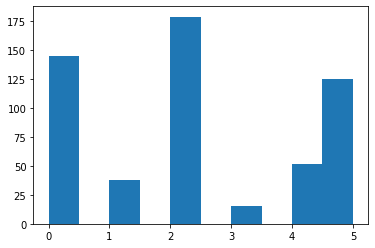

In [72]:
plt.hist(df['cluster'])

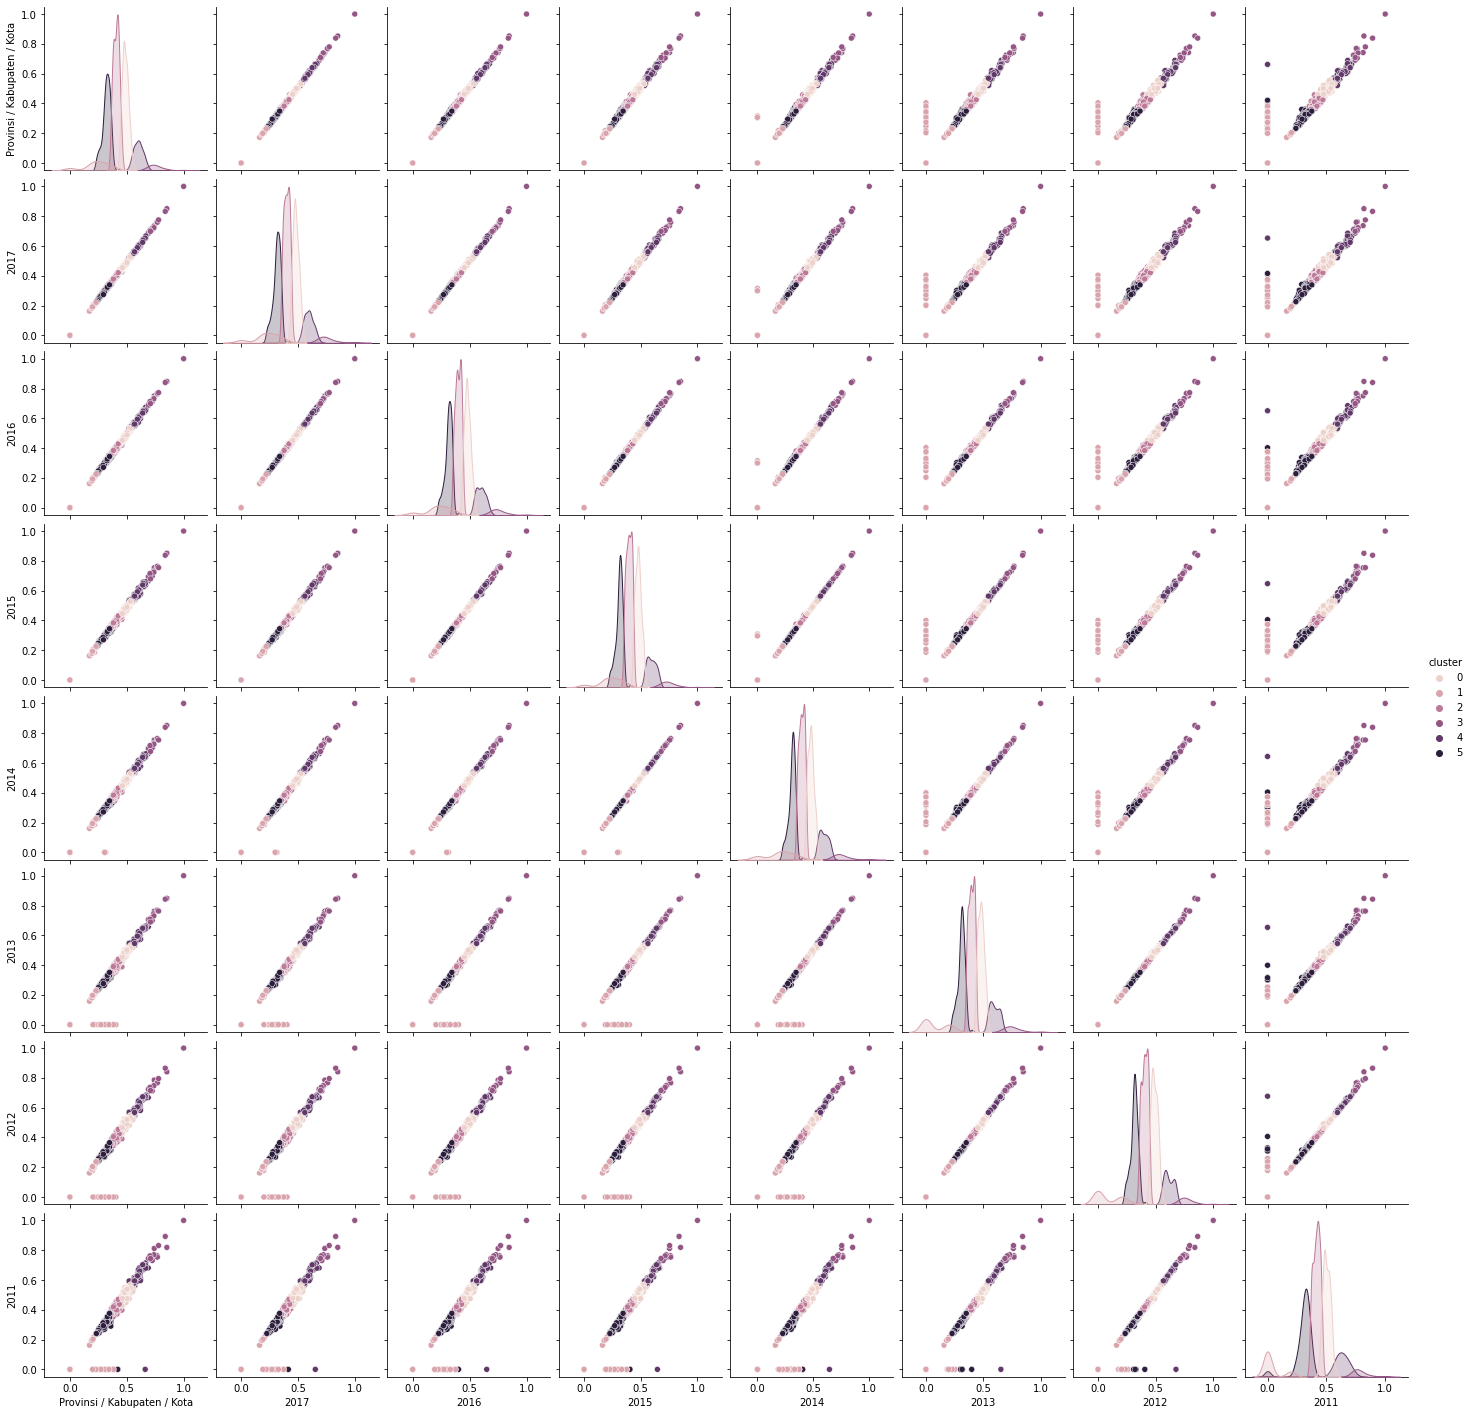

In [75]:
sns.pairplot(df,hue='cluster')


In [77]:
df['Provinsi / Kabupaten / Kota'] = dataku['Provinsi / Kabupaten / Kota']
df

,Provinsi / Kabupaten / Kota,2017,2016,2015,2014,2013,2012,2011,cluster
0,ACEH,0.382348,0.380521,0.373604,0.375629,0.376087,0.387775,0.400626,2
1,SIMEULUE,0.285278,0.282169,0.268192,0.268274,0.269281,0.278683,0.289234,5
2,ACEH SINGKIL,0.351823,0.338991,0.325153,0.326642,0.331284,0.343376,0.357554,5
3,ACEH SELATAN,0.322562,0.322125,0.315337,0.316717,0.319632,0.332144,0.346142,5
4,ACEH TENGGARA,0.314495,0.312211,0.312905,0.312639,0.313852,0.324479,0.336447,5
...,...,...,...,...,...,...,...,...,...
549,DOGIYAI,0.226321,0.228302,0.227891,0.226220,0.227668,0.236068,0.240810,5
550,INTAN JAYA,0.219693,0.223618,0.224919,0.224815,0.227853,0.237177,0.000000,1
551,DEIYAI,0.191130,0.192649,0.193309,0.194000,0.197059,0.204589,0.000000,1
552,KOTA JAYAPURA,0.624411,0.635437,0.638148,0.638419,0.647494,0.672966,0.702030,4
